In [1]:
import numpy as np
import scipy as sp
import scipy.stats

import transform
import statistics
import simulation
import fdrmethods

%matplotlib notebook
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## preliminary simulation

In [17]:
ss0 = [5, 10, 15, 20, 30, 40, 50, 100]
B = 100
sig_bh0 = []
sig_fbh0 = []
sig_ds0 = []

otu_bh0 = []
otu_fbh0 = []
otu_ds0 = []

for j in ss0:
    for i in range(B):
        data0,labels0=simulation.simulatedat(numsamples = j, numdiff=0, numc =100, numd=0)
        rej_bh0=fdrmethods.dsfdr(data0,labels0,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')
        rej_fbh0=fdrmethods.dsfdr(data0,labels0,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='filterBH')
        rej_ds0=fdrmethods.dsfdr(data0,labels0,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='dsfdr')
        
        r_bh0 = np.sum(rej_bh0[0])
        sig_bh0.append(r_bh0)
        
        r_fbh0 = np.sum(rej_fbh0[0])
        sig_fbh0.append(r_fbh0)

        r_ds0 = np.sum(rej_ds0[0])
        sig_ds0.append(r_ds0)

    otu_bh0.append(np.mean(sig_bh0))
    otu_fbh0.append(np.mean(sig_fbh0))
    otu_ds0.append(np.mean(sig_ds0))

<IPython.core.display.Javascript object>


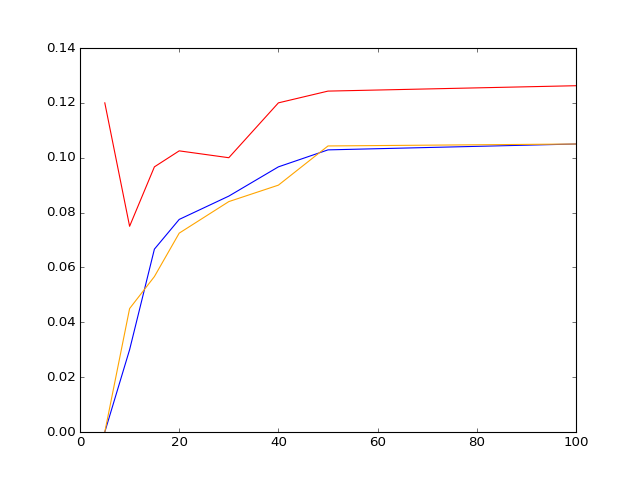

In [22]:
plt.figure()
plt.plot(ss0, otu_bh0, color = 'blue')
plt.plot(ss0, otu_fbh0, color = 'orange')
plt.plot(ss0, otu_ds0, color = 'red')

<IPython.core.display.Javascript object>


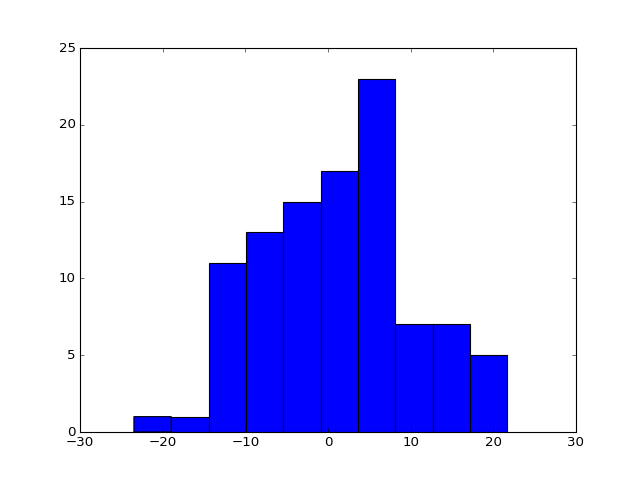

(array([  1.,   1.,  11.,  13.,  15.,  17.,  23.,   7.,   7.,   5.]),
 array([-23.48 , -18.962, -14.444,  -9.926,  -5.408,  -0.89 ,   3.628,
          8.146,  12.664,  17.182,  21.7  ]),
 <a list of 10 Patch objects>)

In [24]:
plt.figure()
plt.hist(rej_bh0[1]) # continous test statistics

## simulation 1

In [2]:
B = 100
ss1 = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
fdr_bh1 = []
fdr_fbh1 = []
fdr_ds1 = []

sig_bh1 = []
sig_fbh1 = []
sig_ds1 = []

otu_bh1 = []
otu_fbh1 = []
otu_ds1 = []

FDR_bh1 = []
FDR_fbh1 = []
FDR_ds1 = []

for j in ss1:
    for i in range(B):
        data1,labels1=simulation.simulatedat(numsamples = j, numdiff=100, numc =100, numd=800)
        rej_bh1=fdrmethods.dsfdr(data1,labels1,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')[0]
        rej_fbh1=fdrmethods.dsfdr(data1,labels1,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='filterBH')[0]
        rej_ds1=fdrmethods.dsfdr(data1,labels1,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='dsfdr')[0]
        
        v_bh1 = np.sum(np.where(rej_bh1)[0]>=100)
        r_bh1 = np.sum(rej_bh1)
        sig_bh1.append(r_bh1)
        fdr_bh1.append(v_bh1/r_bh1)
        
        v_fbh1 = np.sum(np.where(rej_fbh1)[0]>=100)
        r_fbh1 = np.sum(rej_fbh1)
        sig_fbh1.append(r_fbh1)
        fdr_fbh1.append(v_fbh1/r_fbh1)
        
        v_ds1 = np.sum(np.where(rej_ds1)[0]>=100)
        r_ds1 = np.sum(rej_ds1)
        sig_ds1.append(r_ds1)
        fdr_ds1.append(v_ds1/r_ds1)

    print('otu...: %s' %(j))   
    otu_bh1.append(np.mean(sig_bh1))
    otu_fbh1.append(np.mean(sig_fbh1))
    otu_ds1.append(np.mean(sig_ds1))
    
    print('FDR...: %s' %(j))
    FDR_bh1.append(np.nanmean(fdr_bh1))
    FDR_fbh1.append(np.nanmean(fdr_fbh1))
    FDR_ds1.append(np.nanmean(fdr_ds1))
 

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in long_scalars


otu...
FDR...


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in long_scalars


otu...
FDR...
otu...
FDR...
otu...
FDR...
otu...
FDR...
otu...
FDR...
otu...
FDR...
otu...
FDR...
otu...
FDR...
otu...
FDR...
otu...
FDR...
otu...
FDR...
otu...
FDR...


<IPython.core.display.Javascript object>


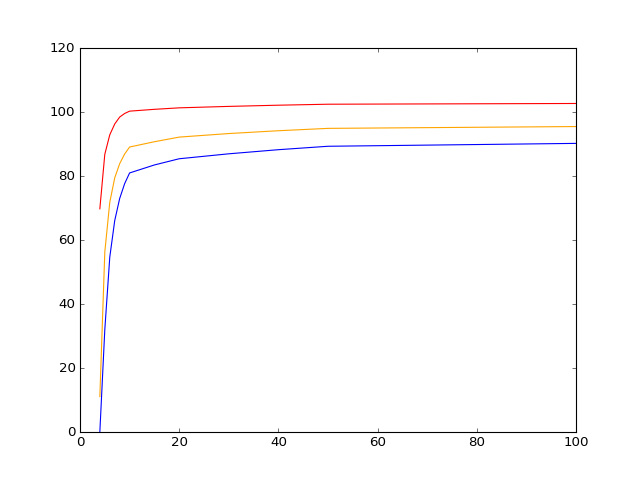

In [7]:
plt.figure()
plt.plot(ss1, otu_bh1, color = 'blue')
plt.plot(ss1, otu_fbh1, color = 'orange')
plt.plot(ss1, otu_ds1, color = 'red')

<IPython.core.display.Javascript object>


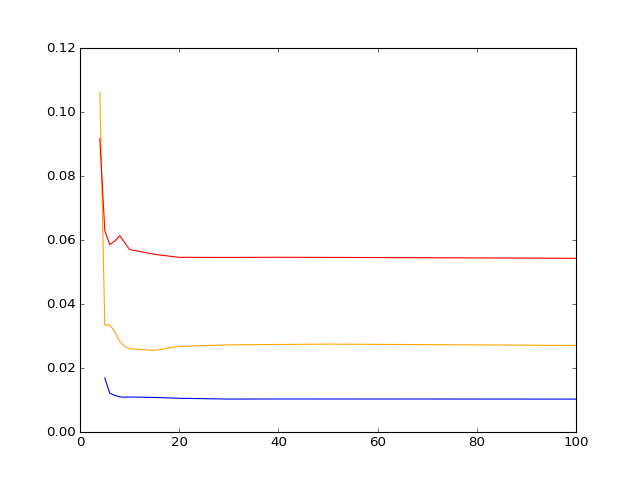

In [8]:
plt.figure()
plt.plot(ss1, FDR_bh1, color = 'blue')
plt.plot(ss1, FDR_fbh1, color = 'orange')
plt.plot(ss1, FDR_ds1, color = 'red')

## simulation 2

In [9]:
B = 100
d = [400,800,2000,4000,8000,10000,15000,20000]
fdr_bh2 = []
fdr_fbh2 = []
fdr_ds2 = []

sig_bh2 = []
sig_fbh2 = []
sig_ds2 = []

otu_bh2 = []
otu_fbh2 = []
otu_ds2 = []

FDR_bh2 = []
FDR_fbh2 = []
FDR_ds2 = []
for j in d:
    for i in range(B):
        data2,labels2=simulation.simulatedat(numsamples = 10, numdiff=100, numc =100, numd=j)
        rej_bh2=fdrmethods.dsfdr(data2,labels2,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')[0]
        rej_fbh2=fdrmethods.dsfdr(data2,labels2,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='filterBH')[0]
        rej_ds2=fdrmethods.dsfdr(data2,labels2,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='dsfdr')[0]
        
        v_bh2 = np.sum(np.where(rej_bh2)[0]>=100)
        r_bh2 = np.sum(rej_bh2)
        sig_bh2.append(r_bh2)
        fdr_bh2.append(v_bh2/r_bh2)
        
        v_fbh2 = np.sum(np.where(rej_fbh2)[0]>=100)
        r_fbh2 = np.sum(rej_fbh2)
        sig_fbh2.append(r_fbh2)
        fdr_fbh2.append(v_fbh2/r_fbh2)
        
        v_ds2 = np.sum(np.where(rej_ds2)[0]>=100)
        r_ds2 = np.sum(rej_ds2)
        sig_ds2.append(r_ds2)
        fdr_ds2.append(v_ds2/r_ds2)
    
    print('otu...: %s' %(j)) 
    otu_bh2.append(np.mean(sig_bh2))
    otu_fbh2.append(np.mean(sig_fbh2))
    otu_ds2.append(np.mean(sig_ds2))
    
    print('FDR...: %s' %(j)) 
    FDR_bh2.append(np.nanmean(fdr_bh2))
    FDR_fbh2.append(np.nanmean(fdr_fbh2))
    FDR_ds2.append(np.nanmean(fdr_ds2))
 



otu...: 400
FDR...: 400
otu...: 800
FDR...: 800
otu...: 2000
FDR...: 2000
otu...: 4000
FDR...: 4000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in long_scalars


otu...: 8000
FDR...: 8000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in long_scalars


otu...: 10000
FDR...: 10000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in long_scalars


otu...: 15000
FDR...: 15000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in long_scalars


otu...: 20000
FDR...: 20000


In [12]:
print(otu_ds2)

[105.44, 105.30500000000001, 104.71666666666667, 104.4725, 104.262, 104.02500000000001, 103.62428571428572, 103.2975]


<IPython.core.display.Javascript object>


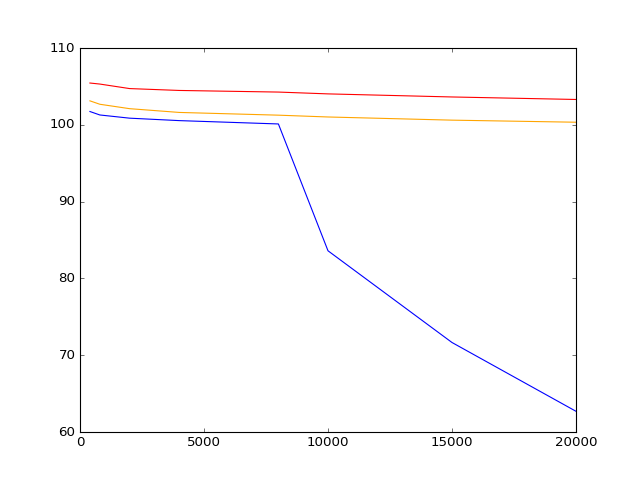

In [10]:
plt.figure()
plt.plot(d, otu_bh2, color = 'blue')
plt.plot(d, otu_fbh2, color = 'orange')
plt.plot(d, otu_ds2, color = 'red')

<IPython.core.display.Javascript object>


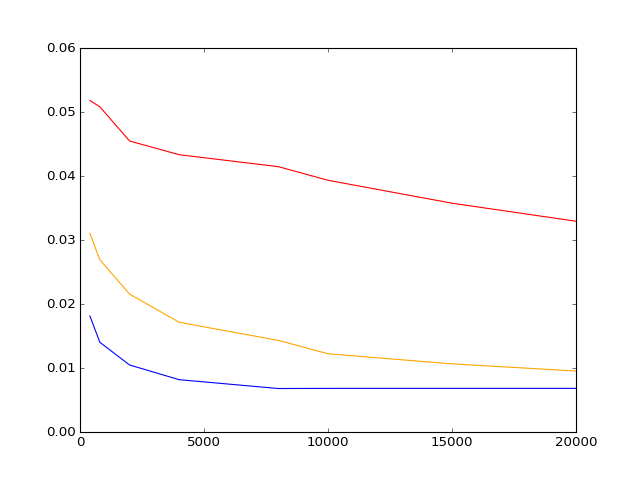

In [11]:
plt.figure()
plt.plot(d, FDR_bh2, color = 'blue')
plt.plot(d, FDR_fbh2, color = 'orange')
plt.plot(d, FDR_ds2, color = 'red')

In [17]:
# more discrete (larger sample size)
B = 100
d = [400,800,4000,4000,8000,10000,15000,40000]
fdr_bh4 = []
fdr_fbh4 = []
fdr_ds4 = []

sig_bh4 = []
sig_fbh4 = []
sig_ds4 = []

otu_bh4 = []
otu_fbh4 = []
otu_ds4 = []

FDR_bh4 = []
FDR_fbh4 = []
FDR_ds4 = []
for j in d:
    for i in range(B):
        data4,labels4=simulation.simulatedat(numsamples = 20, numdiff=100, numc =100, numd=j)
        rej_bh4=fdrmethods.dsfdr(data4,labels4,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')[0]
        rej_fbh4=fdrmethods.dsfdr(data4,labels4,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='filterBH')[0]
        rej_ds4=fdrmethods.dsfdr(data4,labels4,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='dsfdr')[0]
        
        v_bh4 = np.sum(np.where(rej_bh4)[0]>=100)
        r_bh4 = np.sum(rej_bh4)
        sig_bh4.append(r_bh4)
        fdr_bh4.append(v_bh4/r_bh4)
        
        v_fbh4 = np.sum(np.where(rej_fbh4)[0]>=100)
        r_fbh4 = np.sum(rej_fbh4)
        sig_fbh4.append(r_fbh4)
        fdr_fbh4.append(v_fbh4/r_fbh4)
        
        v_ds4 = np.sum(np.where(rej_ds4)[0]>=100)
        r_ds4 = np.sum(rej_ds4)
        sig_ds4.append(r_ds4)
        fdr_ds4.append(v_ds4/r_ds4)
    
    print('otu...: %s' %(j)) 
    otu_bh4.append(np.mean(sig_bh4))
    otu_fbh4.append(np.mean(sig_fbh4))
    otu_ds4.append(np.mean(sig_ds4))
    
    print('FDR...: %s' %(j)) 
    FDR_bh4.append(np.nanmean(fdr_bh4))
    FDR_fbh4.append(np.nanmean(fdr_fbh4))
    FDR_ds4.append(np.nanmean(fdr_ds4))

otu...: 400
FDR...: 400
otu...: 800
FDR...: 800
otu...: 4000
FDR...: 4000
otu...: 4000
FDR...: 4000
otu...: 8000
FDR...: 8000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in long_scalars


otu...: 10000
FDR...: 10000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in long_scalars


otu...: 15000
FDR...: 15000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in long_scalars


otu...: 40000
FDR...: 40000


<IPython.core.display.Javascript object>


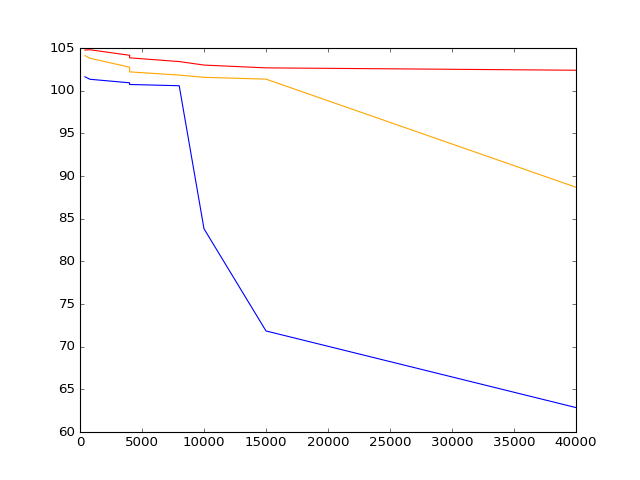

In [18]:
plt.figure()
plt.plot(d, otu_bh4, color = 'blue')
plt.plot(d, otu_fbh4, color = 'orange')
plt.plot(d, otu_ds4, color = 'red')

<IPython.core.display.Javascript object>


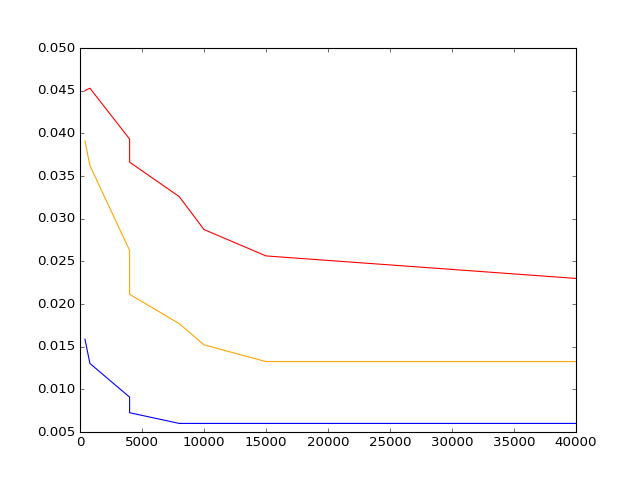

In [19]:
plt.figure()
plt.plot(d, FDR_bh4, color = 'blue')
plt.plot(d, FDR_fbh4, color = 'orange')
plt.plot(d, FDR_ds4, color = 'red')

## simulation 1 with compositionality

In [13]:
B = 100
ss3 = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
fdr_bh3 = []
fdr_fbh3 = []
fdr_ds3 = []

sig_bh3 = []
sig_fbh3 = []
sig_ds3 = []

otu_bh3 = []
otu_fbh3 = []
otu_ds3 = []

FDR_bh3 = []
FDR_fbh3 = []
FDR_ds3 = []

for j in ss3:
    for i in range(B):
        data3,labels3=simulation.simulatedat(normalize=True, numsamples = j, numdiff=100, numc =100, numd=800)
        rej_bh3=fdrmethods.dsfdr(data3,labels3,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')[0]
        rej_fbh3=fdrmethods.dsfdr(data3,labels3,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='filterBH')[0]
        rej_ds3=fdrmethods.dsfdr(data3,labels3,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='dsfdr')[0]
        
        v_bh3 = np.sum(np.where(rej_bh3)[0]>=100)
        r_bh3 = np.sum(rej_bh3)
        sig_bh3.append(r_bh3)
        fdr_bh3.append(v_bh3/r_bh3)
        
        v_fbh3 = np.sum(np.where(rej_fbh3)[0]>=100)
        r_fbh3 = np.sum(rej_fbh3)
        sig_fbh3.append(r_fbh3)
        fdr_fbh3.append(v_fbh3/r_fbh3)
        
        v_ds3 = np.sum(np.where(rej_ds3)[0]>=100)
        r_ds3 = np.sum(rej_ds3)
        sig_ds3.append(r_ds3)
        fdr_ds3.append(v_ds3/r_ds3)
        
    print('otu...: %s' %(j))  
    otu_bh3.append(np.mean(sig_bh3))
    otu_fbh3.append(np.mean(sig_fbh3))
    otu_ds3.append(np.mean(sig_ds3))
    
    print('FDR...: %s' %(j))  
    FDR_bh3.append(np.nanmean(fdr_bh3))
    FDR_fbh3.append(np.nanmean(fdr_fbh3))
    FDR_ds3.append(np.nanmean(fdr_ds3))

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in long_scalars


otu...: 4
FDR...: 4


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in long_scalars


otu...: 5
FDR...: 5
otu...: 6
FDR...: 6
otu...: 7
FDR...: 7
otu...: 8
FDR...: 8
otu...: 9
FDR...: 9
otu...: 10
FDR...: 10
otu...: 15
FDR...: 15
otu...: 20
FDR...: 20
otu...: 30
FDR...: 30
otu...: 40
FDR...: 40
otu...: 50
FDR...: 50
otu...: 100
FDR...: 100


<IPython.core.display.Javascript object>


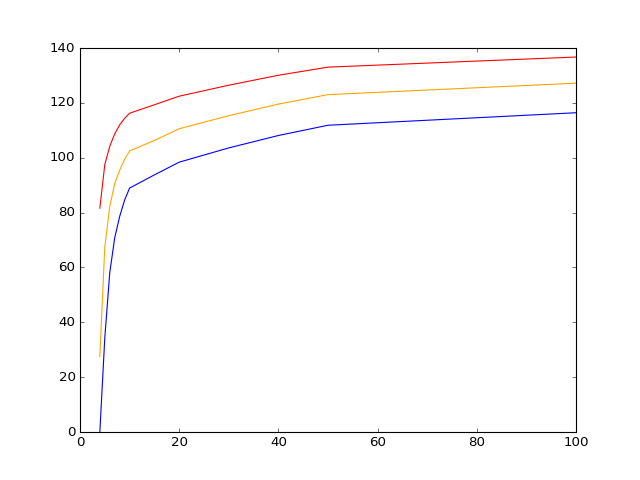

In [15]:
plt.figure()
plt.plot(ss3, otu_bh3, color = 'blue')
plt.plot(ss3, otu_fbh3, color = 'orange')
plt.plot(ss3, otu_ds3, color = 'red')

<IPython.core.display.Javascript object>


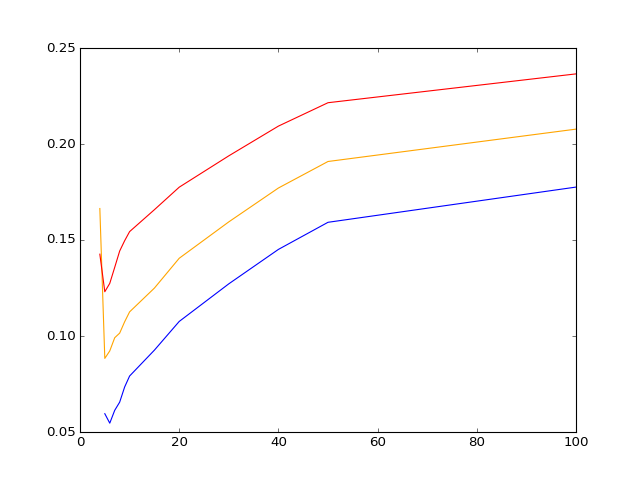

In [16]:
plt.figure()
plt.plot(ss3, FDR_bh3, color = 'blue')
plt.plot(ss3, FDR_fbh3, color = 'orange')
plt.plot(ss3, FDR_ds3, color = 'red')

## Simulation 2 with compositionality

In [20]:
B = 100
d = [400,800,2000,4000,8000,10000,15000,20000]
fdr_bh5 = []
fdr_fbh5 = []
fdr_ds5 = []

sig_bh5 = []
sig_fbh5 = []
sig_ds5 = []

otu_bh5 = []
otu_fbh5 = []
otu_ds5 = []

FDR_bh5 = []
FDR_fbh5 = []
FDR_ds5 = []
for j in d:
    for i in range(B):
        data5,labels5=simulation.simulatedat(normalize=True, numsamples = 10, numdiff=100, numc =100, numd=j)
        rej_bh5=fdrmethods.dsfdr(data5,labels5,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')[0]
        rej_fbh5=fdrmethods.dsfdr(data5,labels5,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='filterBH')[0]
        rej_ds5=fdrmethods.dsfdr(data5,labels5,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='dsfdr')[0]
        
        v_bh5 = np.sum(np.where(rej_bh5)[0]>=100)
        r_bh5 = np.sum(rej_bh5)
        sig_bh5.append(r_bh5)
        fdr_bh5.append(v_bh5/r_bh5)
        
        v_fbh5 = np.sum(np.where(rej_fbh5)[0]>=100)
        r_fbh5 = np.sum(rej_fbh5)
        sig_fbh5.append(r_fbh5)
        fdr_fbh5.append(v_fbh5/r_fbh5)
        
        v_ds5 = np.sum(np.where(rej_ds5)[0]>=100)
        r_ds5 = np.sum(rej_ds5)
        sig_ds5.append(r_ds5)
        fdr_ds5.append(v_ds5/r_ds5)
    
    print('otu...: %s' %(j)) 
    otu_bh5.append(np.mean(sig_bh5))
    otu_fbh5.append(np.mean(sig_fbh5))
    otu_ds5.append(np.mean(sig_ds5))
    
    print('FDR...: %s' %(j)) 
    FDR_bh5.append(np.nanmean(fdr_bh5))
    FDR_fbh5.append(np.nanmean(fdr_fbh5))
    FDR_ds5.append(np.nanmean(fdr_ds5))

otu...: 400
FDR...: 400
otu...: 800
FDR...: 800
otu...: 2000
FDR...: 2000
otu...: 4000
FDR...: 4000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in long_scalars


otu...: 8000
FDR...: 8000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in long_scalars


otu...: 10000
FDR...: 10000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in long_scalars


otu...: 15000
FDR...: 15000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in long_scalars


otu...: 20000
FDR...: 20000


<IPython.core.display.Javascript object>


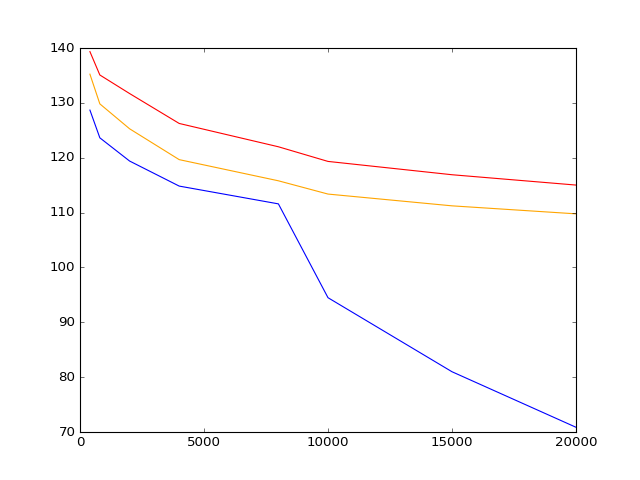

In [21]:
plt.figure()
plt.plot(d, otu_bh5, color = 'blue')
plt.plot(d, otu_fbh5, color = 'orange')
plt.plot(d, otu_ds5, color = 'red')

<IPython.core.display.Javascript object>


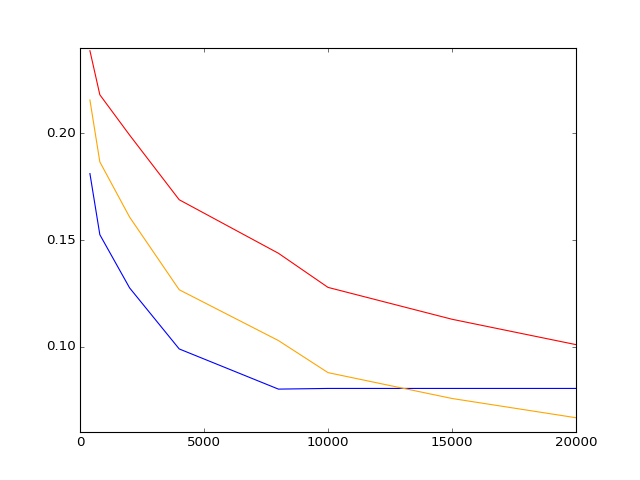

In [22]:
plt.figure()
plt.plot(d, FDR_bh5, color = 'blue')
plt.plot(d, FDR_fbh5, color = 'orange')
plt.plot(d, FDR_ds5, color = 'red')

In [ ]:
# check test statistics with excessive 0's
B = 100
d = [10,50,100,150,200,400,600,800,1000,1500,2000]

for j in d:
    for i in range(B):
        data,labels=simulation.simulatedat(numsamples = 10, numdiff=100, numc =100, numd=j)
        tstat2=fdrmethods.dsfdr(data,labels,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')[1]
        plt.hist(tstat2)

In [ ]:
# check test statistics with bigger sample size
B = 100
d = [10,50,100,150,200,400,600,800,1000,1500,2000]

for j in d:
    for i in range(B):
        data,labels=simulation.simulatedat(numsamples = 20, numdiff=100, numc =100, numd=j)
        tstat2=fdrmethods.dsfdr(data,labels,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')[1]
        plt.hist(tstat2)